In [110]:
#Dependencies
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree
#Random Forest Dependencies
from sklearn.ensemble import RandomForestClassifier

In [98]:
#Read Path
read_path = os.path.join('Resources/')

In [123]:
diabetes_df = pd.read_csv(f'{read_path}diabetes.csv')

In [124]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
#Inspect data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Replace Zeros with Null values in certain variables
diabetes_examination = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [7]:
#Determine number of Null Values
diabetes_examination.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [31]:
len(diabetes_examination.dropna())

392

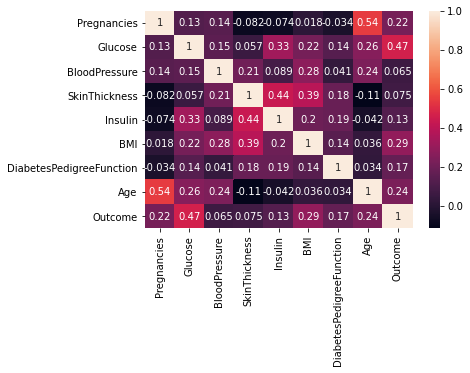

In [8]:
#Correlation between variables

sns.heatmap(diabetes_df.corr(), annot = True)

## Predict Insulin Null values

In [9]:
#Defining X & Y
y = diabetes_df.Insulin.values.reshape(-1, 1)
X = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
print(X.shape, y.shape)

(768, 7) (768, 1)


In [11]:
accuracy = model.score(X, y)
print(accuracy*100)

29.949208499164428


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
Y_predicted = model.predict(X_test)

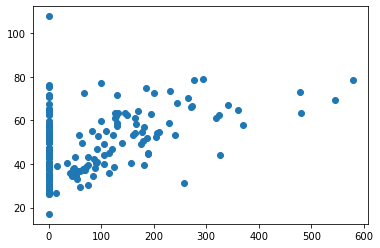

In [27]:
#Insulin Plot
plt.scatter(y_test, Y_predicted)

In [13]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,39.9,0.569,44
73,4,129,86,20,35.1,0.231,23
352,3,61,82,28,34.4,0.243,46
497,2,81,72,15,30.1,0.547,25
145,0,102,75,23,0.0,0.572,21


In [14]:
#Standard Scaler 
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

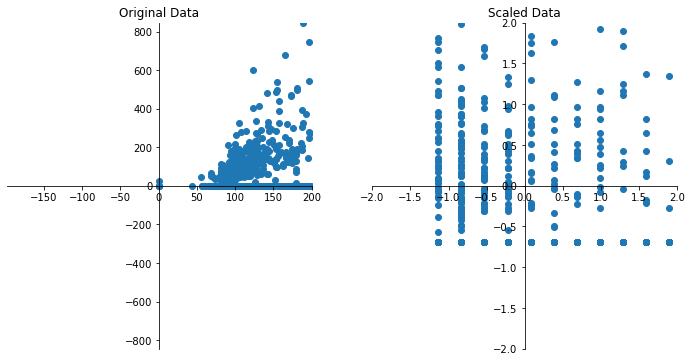

In [19]:
#Original and scaled plots

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Glucose"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Glucose"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

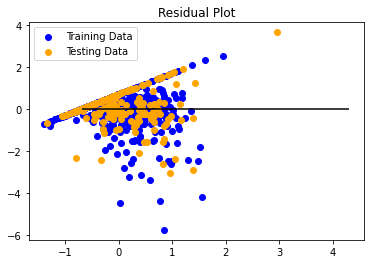

In [20]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled,\
            c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange",\
            label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [23]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6839486650709644, R2: 0.26794596685657157


# Diabetes Model 1 - Regression

In [63]:
list = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for data in list:
    diabetes_df[data] = diabetes_df[data].replace(0,np.nan)

In [65]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [67]:
diabetes = diabetes_df.dropna()

In [68]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [86]:
#Defining X & Y
y = diabetes.Outcome
X = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
519,6,129.0,90.0,7.0,326.0,19.6,0.582,60
35,4,103.0,60.0,33.0,192.0,24.0,0.966,33
137,0,93.0,60.0,25.0,92.0,28.7,0.532,22
316,3,99.0,80.0,11.0,64.0,19.3,0.284,30
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33


In [89]:
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_test, y_test))

0.18380252638303451


In [90]:
predictions = model.predict(X_test)

In [91]:
predictions

array([ 0.31567544,  0.37396502, -0.04499202,  0.75947723,  0.77424727,
        0.18329926, -0.28155703,  0.01276106,  0.65623931,  0.06991265,
        0.4605859 ,  0.57000951,  0.32565695,  0.19164493,  0.53564046,
        0.23417776,  0.90266035,  0.12012119,  0.5292626 ,  0.53436248,
       -0.12325665,  0.50271595,  0.61849376, -0.1035085 ,  0.1910253 ,
       -0.10820894,  1.0213757 ,  0.32227872,  0.39924619, -0.0808017 ,
        0.40616522,  0.65796554,  0.03282008,  0.35225674,  0.31445451,
        0.65398176, -0.0421267 ,  0.18395144,  0.63257011,  0.89735395,
        0.8249427 ,  0.26843572,  0.19514482,  0.56701953,  0.15859156,
        0.65640356,  0.26619077,  0.89448949,  0.01774096,  0.14342778,
        0.23793193,  0.14694766,  0.38872068,  0.29932867,  0.372209  ,
        0.4939081 ,  0.32759732, -0.09791673, -0.0185619 ,  0.1639043 ,
        0.06897481,  0.17921441,  0.47712182,  0.3766989 , -0.11635383,
        0.16807043, -0.05930484,  0.28987772, -0.01774195,  0.67

# Diabetes Model 2 - Random Forest

In [142]:
diabetes = pd.read_csv(f'{read_path}diabetes-dataset.csv')

In [143]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [144]:
#Replace Zeros with Null values in certain variables
diabetes_examination = diabetes[['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [145]:
#Determine number of Null Values
diabetes_examination.isnull().sum()

Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [146]:
#Define target
target = diabetes_df['Outcome']
target_names = ['negative', 'positive']

In [149]:
#Dine data
data = diabetes_df.drop(['Outcome', 'Pregnancies','BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction'], axis=1)
feature_name = data.columns
data.head()

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [150]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [151]:
# Create a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.625

In [153]:
#Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.71875

In [154]:
# Feature importance
importances = rf.feature_importances_
importances

array([0.41339008, 0.33213576, 0.25447416])

In [155]:
sorted(zip(rf.feature_importances_, feature_name), reverse=True)

[(0.4133900760532334, 'Glucose'),
 (0.3321357607102256, 'BMI'),
 (0.254474163236541, 'Age')]

In [156]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [157]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [158]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.28
